In [311]:
import numpy as np # type: ignore
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_score
from sklearn.model_selection import train_test_split

## Variables and their respective meaning<br>
`Age`: Age of the patient<br>
`Sex`: Sex of patient<br>
`cp`: Chest Pain Type<br>
`trestbps`: Resting Blood Pressure<br>
`chol`: serum cholestoral in mg/dl <br>
`fbs`: fasting blood sugar > 120 mg/dl<br>
`restecg`: resting electrocardiographic results (values 0,1,2)<br>
`thalach`: maximum heart rate achieved<br>
`exang`: exercise induced angina<br>
`oldpeak`: ST depression induced by exercise relative to rest<br> 
`slope`: the slope of the peak exercise ST segment<br> 
`ca`: number of major vessels (0-3) colored by flourosopy<br>   
`thal`: 0 = normal; 1 = fixed defect; 2 = reversable defect<br>


In [2]:
train_df = pd.read_csv(r'Train_Dataset.csv')

In [10]:
test_df = pd.read_csv(r'Test_Dataset.csv')

In [3]:
train_df.shape

(7303, 15)

In [4]:
train_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
#checking for null values in the train dataset
train_df.isna().sum(axis=0)

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#checking for null values in the test dataset
test_df.isna().sum(axis=0)

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

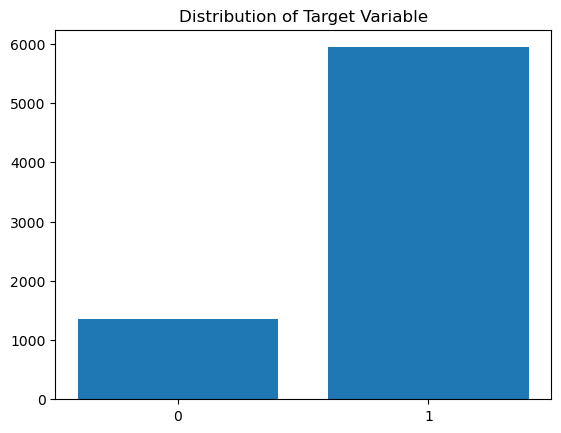

In [7]:
#Distribution of the target variable
target_group = train_df.groupby('target').agg(count=pd.NamedAgg(column='target', aggfunc='count')).reset_index().astype(dtype={'target':'str'})
plt.bar(x='target', height='count', data=target_group);
plt.title('Distribution of Target Variable');

In [9]:
train_df.target.value_counts(normalize=True)

1    0.813501
0    0.186499
Name: target, dtype: float64

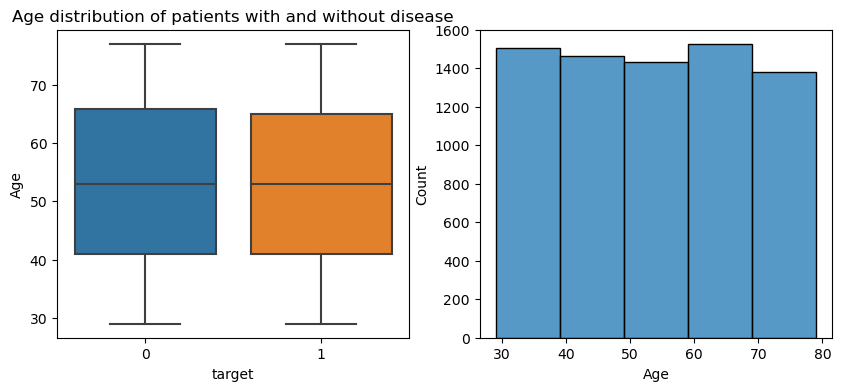

In [26]:
#Chart showing the age distribution of patients who are likely to have heart disease
fig, ax = plt.subplots(1, 2, figsize=(10,4))
#plt.hist(x='Age', data=train_df, axes=ax[1])
sns.boxplot(x='target', y='Age', data=train_df, ax=ax[0]);
ax[0].set_title('Age distribution of patients who are likely to have heart disease')
sns.histplot(x='Age', data=train_df, ax=ax[1], binwidth=10);

In [29]:
#Grouping Sex and target variable for visualization
group_target_sex = train_df.groupby(['target', 'Sex']).agg(count=pd.NamedAgg(column='Id', aggfunc='count')).reset_index()
group_target_sex

,target,Sex,count
0,0,0,725
1,0,1,637
2,1,0,2929
3,1,1,3012


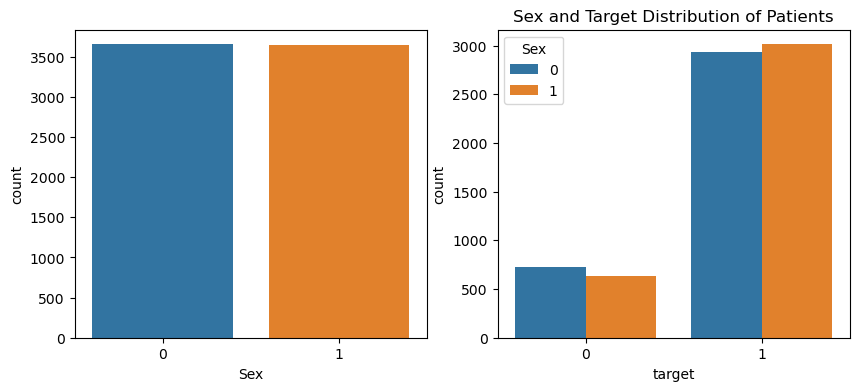

In [39]:
#Sex and Target distribution of patients
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.title('Sex and Target Distribution of Patients',loc='center');
sns.countplot(x='Sex', data=train_df, ax=ax[0]);

sns.barplot(x='target', y='count', data=group_target_sex, hue='Sex', ax=ax[1]);

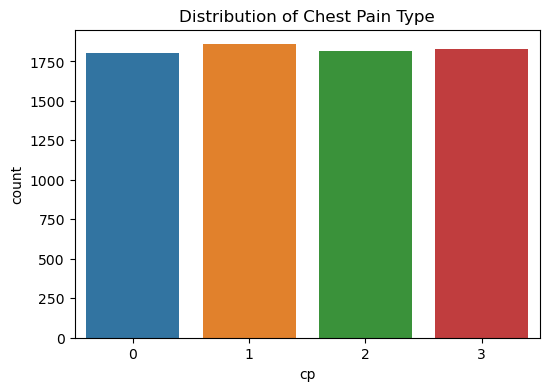

In [42]:
#Distribution of Chest Pain Type
plt.figure(figsize=(6,4));
sns.countplot(x='cp', data=train_df);
plt.title('Distribution of Chest Pain Type');

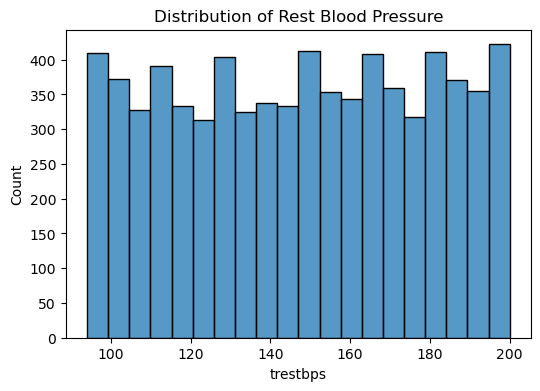

In [44]:
#Distribution of Rest Blood Pressure
plt.figure(figsize=(6,4));
sns.histplot(x='trestbps', data=train_df);
plt.title('Distribution of Rest Blood Pressure');

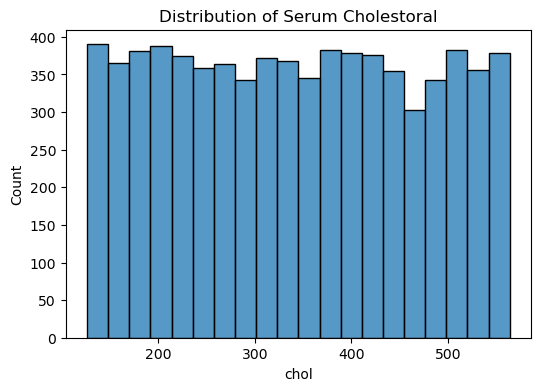

In [46]:
#Distribution of Serum Cholestoral
plt.figure(figsize=(6,4));
sns.histplot(x='chol', data=train_df);
plt.title('Distribution of Serum Cholestoral');

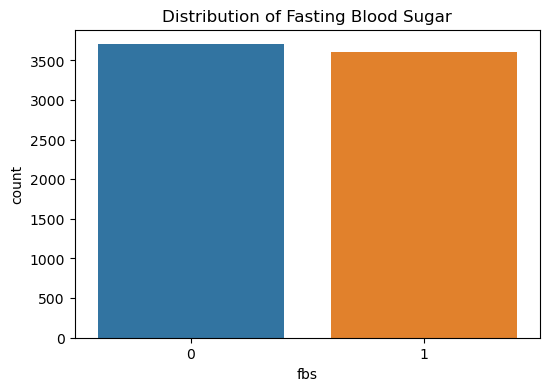

In [48]:
#Distribution of Fasting Blood Sugar
plt.figure(figsize=(6,4));
sns.countplot(x='fbs', data=train_df);
plt.title('Distribution of Fasting Blood Sugar');

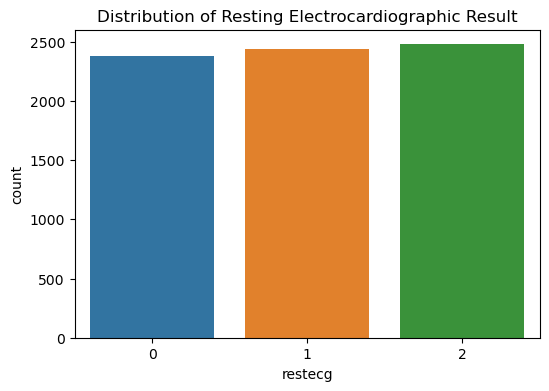

In [51]:
#Distribution of Resting Electrocardiographic Result
plt.figure(figsize=(6,4));
sns.countplot(x='restecg', data=train_df);
plt.title('Distribution of Resting Electrocardiographic Result');

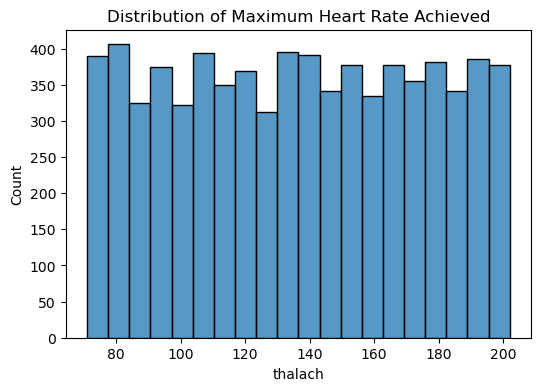

In [55]:
#Distribution of Maximum Heart Rate Achieved
plt.figure(figsize=(6,4));
sns.histplot(x='thalach', data=train_df);
plt.title('Distribution of Maximum Heart Rate Achieved');

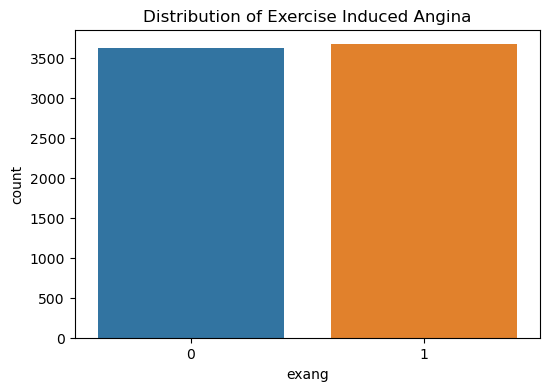

In [57]:
#Distribution of Exercise Induced Angina
plt.figure(figsize=(6,4));
sns.countplot(x='exang', data=train_df);
plt.title('Distribution of Exercise Induced Angina');

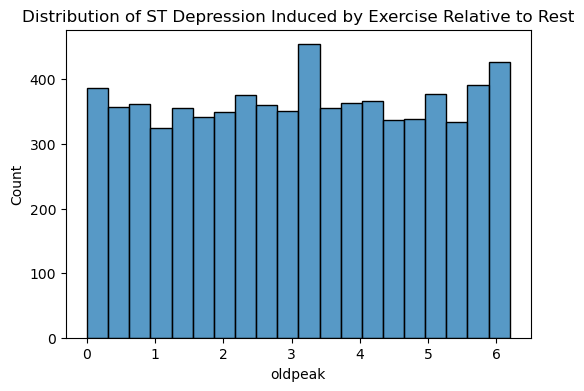

In [60]:
#Distribution of ST Depression Induced by Exercise Relative to Rest
plt.figure(figsize=(6,4));
sns.histplot(x='oldpeak', data=train_df);
plt.title('Distribution of ST Depression Induced by Exercise Relative to Rest');

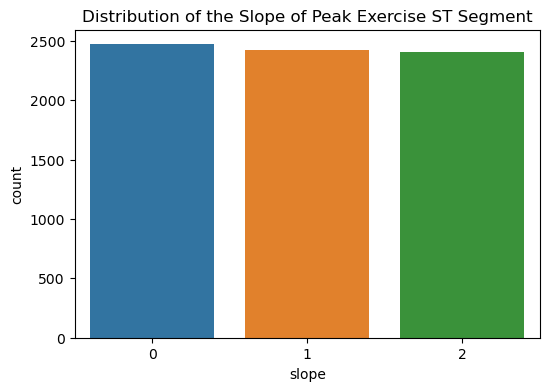

In [63]:
#Distribution of the Slope of Peak Exercise ST Segment
plt.figure(figsize=(6,4));
sns.countplot(x='slope', data=train_df);
plt.title('Distribution of the Slope of Peak Exercise ST Segment');

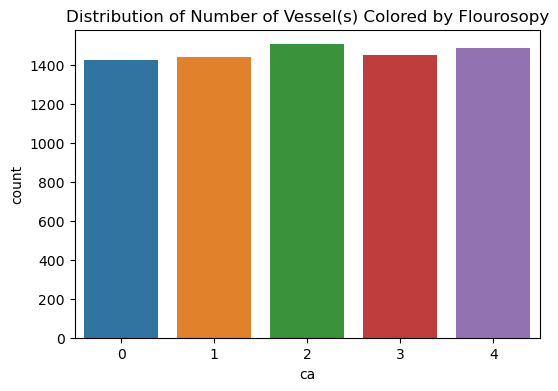

In [65]:
#Distribution of Number of Vessel(s) Colored by Flourosopy
plt.figure(figsize=(6,4));
sns.countplot(x='ca', data=train_df);
plt.title('Distribution of Number of Vessel(s) Colored by Flourosopy');

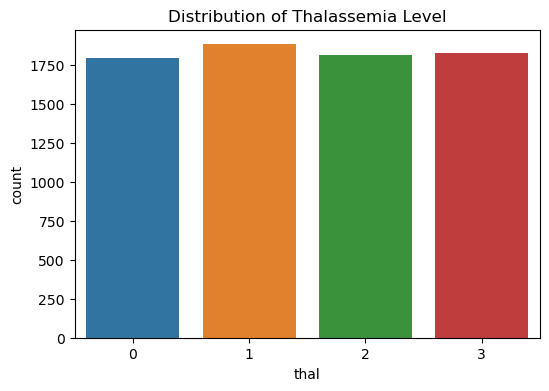

In [67]:
#Distribution of Thalassemia Level
plt.figure(figsize=(6,4));
sns.countplot(x='thal', data=train_df);
plt.title('Distribution of Thalassemia Level');

In [73]:
#Creating a Correlation table of the predictors
train_df_corr = train_df.drop('Id', axis=1).corr()

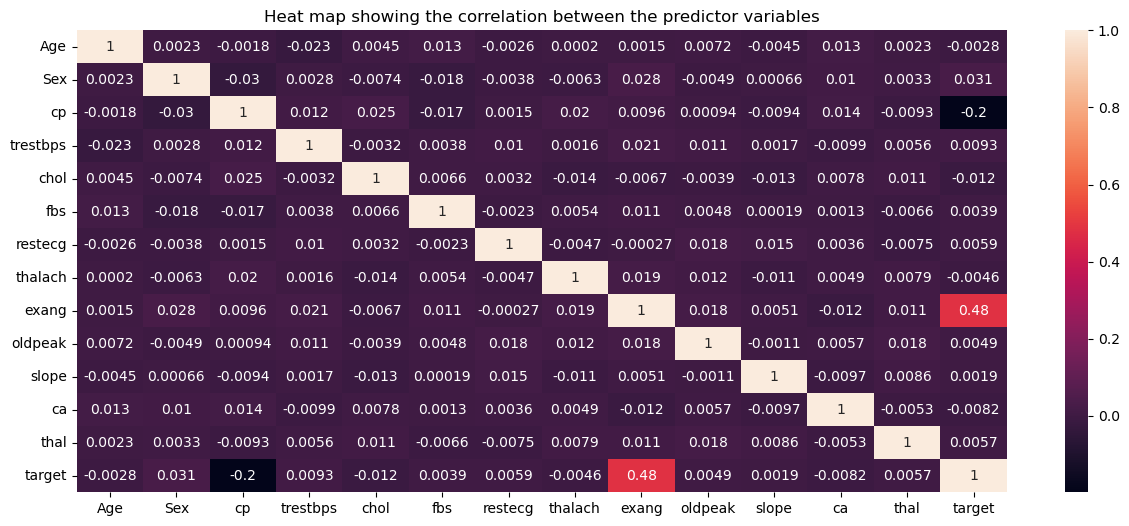

In [75]:
#Heat map showing the correlation between the predictor variables
plt.figure(figsize=(15,6));
sns.heatmap(train_df_corr, annot=True);
plt.title('Heat map showing the correlation between the predictor variables');

In [196]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

In [585]:
train_df_copy = train_df.copy().drop('Id', axis=1)

In [586]:
train_df_copy.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


**RESCALING THE NUMERICAL FEATURES IN ORDER TO AVOID ANY FEATURE HAVING A HIGHER INFLUENCE ON THE MODEL**

In [587]:
scale = MinMaxScaler().fit_transform(train_df_copy[['Age','trestbps','chol','thalach', 'oldpeak']])

In [340]:
scale[0]

array([0.33333333, 1.        , 0.        , 0.63358779, 0.        ,
       0.24193548, 0.5       , 1.        , 0.33333333])

In [588]:
train_df_copy.loc[:, ['Age','trestbps','chol','thalach', 'oldpeak']] = scale

In [589]:
train_df_copy.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.083333,0,1,0.603774,0.180365,1,0,0.633588,0,0.241935,1,4,1,1
1,0.500000,1,2,0.981132,0.063927,0,1,0.251908,0,0.129032,2,1,0,0
2,0.166667,1,2,0.066038,0.173516,1,0,0.641221,0,0.338710,1,3,1,1
3,0.958333,0,0,0.179245,0.410959,1,2,0.129771,1,0.790323,0,2,2,1
4,0.125000,1,2,0.424528,0.668950,1,1,0.725191,1,0.145161,2,4,0,1


**RESAMPLING OF THE TARGET FEATURE**<br>
**THE 0 CLASS WAS UPSAMPLE TO 40% OF THE DATASET**<br>
**THE 1 CLASS WAS DOWNSAMPLE TO 60% OF THE DATASET**

In [609]:
df1 = resample(train_df_copy[train_df_copy.target == 0], replace=True, n_samples=int(0.4 * len(train_df_copy)), random_state=42)

In [610]:
df2 = resample(train_df_copy[train_df_copy.target == 1], replace=False, n_samples=int(0.6 * len(train_df_copy)), random_state=42)

In [611]:
len(df2)

4381

In [615]:
train_df_resample = pd.concat([df1, df2], axis=0)

In [616]:
train_df_resample.shape

(7302, 14)

In [618]:
target_variable = train_df_resample.target

In [619]:
predictor_variables = train_df_resample.drop(['target'], axis=1)

## MODEL  BUILDING

In [635]:
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variable, stratify=target_variable, test_size=0.25)

In [636]:
boost_clf = CatBoostClassifier(learning_rate=0.01, use_best_model=True)

In [637]:
boost_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=False);

In [640]:
boost_y_pred = boost_clf.predict(X_test)

**MODEL'S METRIC SCORES**

In [641]:
print(f'Precision Score: {precision_score(boost_y_pred, y_test)}')
print(f'Recall Score: {recall_score(boost_y_pred, y_test)}')
print(f'Accuracy Score: {accuracy_score(boost_y_pred, y_test)}')

Precision Score: 0.7755474452554745
Recall Score: 0.9941520467836257
Accuracy Score: 0.8625410733844469


In [642]:
dd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(boost_y_pred,y_test),display_labels=boost_clf.classes_)

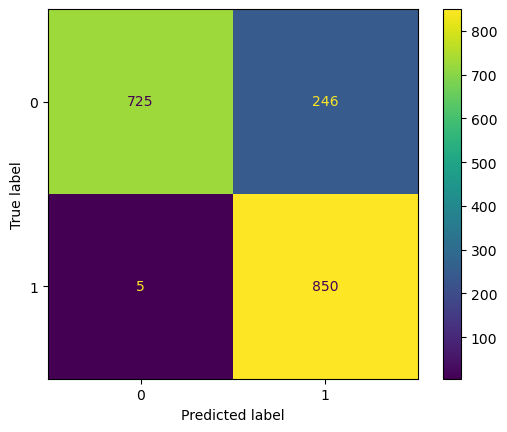

In [643]:
dd.plot()

## FINAL PREDICTION ON THE TEST DATASET

In [647]:
test1 = test_df.drop('id', axis=1).rename(columns={'age':'Age', 'sex':'Sex'})

In [648]:
test_scale = MinMaxScaler().fit_transform(test1[['Age','trestbps','chol','thalach', 'oldpeak']])

In [649]:
test1.loc[:, ['Age','trestbps','chol','thalach', 'oldpeak']] = test_scale

In [650]:
test1.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.854167,1,0,0.650943,0.842466,0,2,0.755725,1,0.322581,1,0,1
1,0.666667,1,0,0.349057,0.255708,0,2,0.022901,1,0.790323,2,2,2
2,0.500000,1,0,0.009434,0.986301,1,1,0.015267,1,0.112903,1,1,0
3,0.166667,0,1,0.792453,0.367580,0,1,0.923664,1,0.919355,1,0,0
4,0.125000,0,3,0.094340,0.353881,0,0,0.389313,0,0.209677,1,4,3


In [651]:
y_pred_final = boost_clf.predict(test1)

In [652]:
np.unique(y_pred_final)

array([0, 1], dtype=int64)

In [653]:
submit_df = pd.DataFrame(data={'ID':test_df.id, 'Target':y_pred_final})

In [654]:
submit_df.head()

,ID,Target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0


In [581]:
submit_df.to_csv(r'submission10.csv', index=False)